# Case Study: NHANES Dataset

This notebook analyzes the NHANES dataset, focusing on **uninvariate analysis**.

The [NHANES Dataset](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx) contains the results of the National Health and Nutrition Examination Survey, from the CDC (USA). We have many variables in code in it.
The codebooks for the 2015-2016 wave of NHANES can be found here:

https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015

Direct links:

- [Demographics code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)
- [Body measures code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm)
- [Blood pressure code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm)
- [Alcohol questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm)
- [Smoking questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm)

The commands in this file were written mainly while following a lab notebook on Coursera on the same topic.

Overview:
1. Categorical Data: Fequency Tables
2. Quantitative Variables: Numerical Summaries
3. Graphical Summaries: Histograms & Boxplots
4. Stratification


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

### 1. Categorical Data: Fequency Tables

Example variables:
- [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2): education level in adults.
- RIAGENDR: gender.

In [15]:
# Count number of category levels
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [4]:
da.DMDEDUC2.value_counts().sum()

5474

In [5]:
da.DMDEDUC2.shape

(5735,)

We see there is a discrepancy: missing values.

In [6]:
pd.isnull(da.DMDEDUC2).sum()

261

In [8]:
# Check that numbers add up: total - null - nonull = 0
da.DMDEDUC2.shape[0] - da.DMDEDUC2.value_counts().sum() - pd.isnull(da.DMDEDUC2).sum()

0

In [12]:
# We might want to create a new variable (e.g., var_x)
# which contains human readable labels for the different category levels
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [13]:
# Similar for gender
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [14]:
# Proportions
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

In [17]:
# Create a category-evel for missing cases (null)
# Sometimes we want to do that instead of eliminating/ignoring those cases
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

### 2. Quantitative Variables: Numerical Summaries

Example variables:
- [BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT): weight (kg).
- [BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1): systolic (SY) blood pressure (BPX), 1st measurement. A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic (DI instead of SY) blood pressure is between 80 and 89. Three measurements are taken because of the "white coat anxiety": blood pressure might be slightly elevated in the first measurement due to anxiety, but it decreases in following measurements.
- RIDAGEYR: age (years).

In [29]:
# describe() provides numerical summaries of quantitative data
# Note: use dropna() before applying any describe()
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [20]:
# Manual summaries
x = da.BMXWT.dropna() # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function
print(x.median())
print(np.percentile(x, 50)) # 50th percentile, same as the median
print(np.percentile(x, 75)) # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


In [26]:
# Number of people with pre-hypertension
# Note we apply logic operators
# and then we compute the mean of the True/1 values
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))

0.3741935483870968

In [27]:
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89))

0.14803836094158676

In [28]:
# Combined: hypertension according to SY or DI
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
print(np.mean(a | b))

0.43975588491717527


In [35]:
# Is the white coat anxiety?
# Mean differences between 1st and 2nd measurements
# The differences seem to be rather small
print(np.mean(da.BPXSY1))
print(np.mean(da.BPXDI1))
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))

125.08461396037771
69.5163858544714
0.6749860309182343
0.3490407897187558


### 3. Graphical Summaries: Histograms & Boxplots

<AxesSubplot:xlabel='BMXWT', ylabel='Density'>

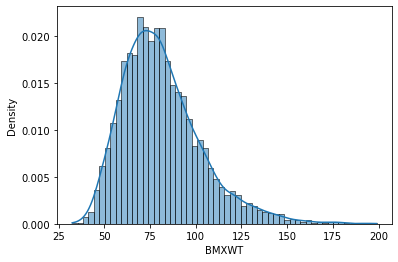

In [47]:
# Weight: Histogram - use dropna()
# Right skewed
#sns.distplot(da.BMXWT.dropna()) # distplot is deprecated, use histplot
sns.histplot(da.BMXWT.dropna(),kde=True,stat='density')

<AxesSubplot:xlabel='BPXSY1', ylabel='Density'>

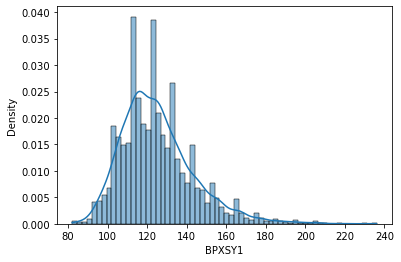

In [48]:
# Systolic blood pressure: Histogram
# We see some bumps - are there some rouding tendencies? (e.g., nearest 5 or 10 units)
sns.histplot(da.BPXSY1.dropna(),kde=True,stat='density')

Text(0, 0.5, 'Blood pressure in mm/Hg')

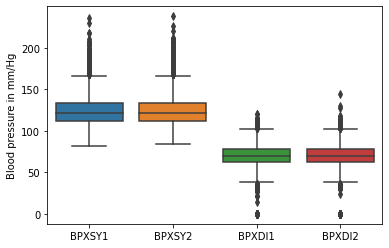

In [51]:
# Boxplot: Systolic and Distolic, 1st and 2nd measurement
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
bp.set_ylabel("Blood pressure in mm/Hg")

### 4. Stratification

We can get more insights from a dataset if we stratify the information in different strata that are more homogeneous. That is particularly true for human measurements; we can create groups according to age, gender, race, etc.

In [56]:
# Create age strata based on these cut points
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

In [60]:
# Our new variable contains the age range/cut for each person/measurement
da["agegrp"].value_counts()

(18, 30]    1153
(30, 40]     932
(50, 60]     924
(40, 50]     903
(60, 70]     878
(70, 80]     812
Name: agegrp, dtype: int64

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

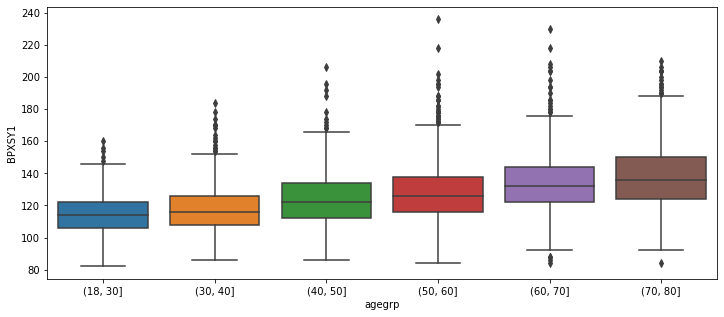

In [62]:
plt.figure(figsize=(12, 5))
# Make boxplot of BPXSY1 stratified by age group
# The older, the higher the systolic blood pressure
sns.boxplot(x="agegrp", y="BPXSY1", data=da)

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

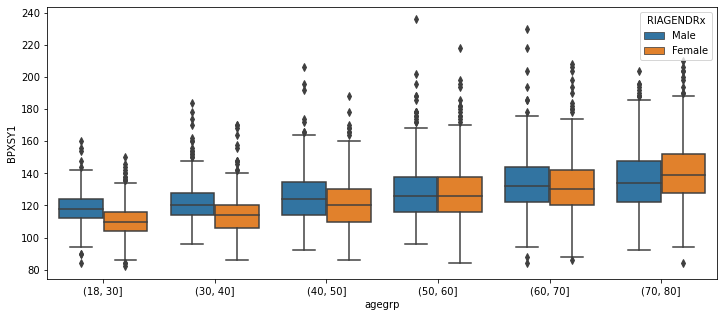

In [68]:
# We further add a hue variable: gender
# Women have a lower blood pressure, except at older ages
# Maybe that is because male with high blood pressure die younger?
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da)

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BPXSY1'>

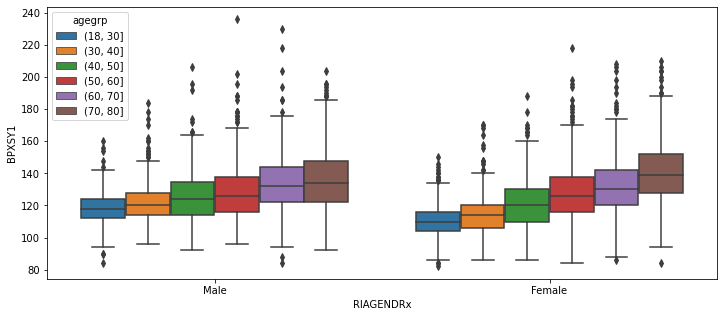

In [65]:
# We can stratify the opposite way: instead of age & gender, gender & age
# Just swap x & hue
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

#### Stratification for Categorical Variables

In [66]:
da.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

Note on **causality and confounding**. From the [Wikipeadia](https://en.wikipedia.org/wiki/Confounding): "a confounder
is a variable that influences both the dependent variable and independent variable, causing a spurious association". Thus it seems there is causality between the dependent and the independent variable, but in reality there is not!

While age might cause higher blood pressure, age probably does not cause educational levels to vary as they do. That is so because we have a "birth cohort effect": people in their 20's now are more likely to go to college and the survey was done at the same point in time (cross sectional survey) for all ages.

**Advanced stratified table**: percentage of education level stratified by age group and gender.

In [67]:
# Eliminate rare/missing values
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :] 
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
# Restructure the results from 'long' to 'wide'
dx = dx.unstack()
# Normalize within each stratum to get proportions
dx = dx.apply(lambda x: x/x.sum(), axis=1)
# Limit display to 3 decimal places
print(dx.to_string(float_format="%.3f"))

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049    0.282   0.215            0.374
         Male      0.117 0.042    0.258   0.250            0.333
(30, 40] Female    0.089 0.097    0.314   0.165            0.335
         Male      0.151 0.103    0.251   0.227            0.269
(40, 50] Female    0.110 0.106    0.299   0.173            0.313
         Male      0.142 0.112    0.274   0.209            0.262
(50, 60] Female    0.117 0.102    0.245   0.234            0.302
         Male      0.148 0.123    0.231   0.242            0.256
(60, 70] Female    0.118 0.188    0.195   0.206            0.293
         Male      0.135 0.151    0.233   0.231            0.249
(70, 80] Female    0.105 0.225    0.149   0.240            0.281
         Male      0.113 0.180    0.237   0.215            0.255
